# Word embeddings

## Install packages

In [14]:
!pip install gensim
!pip install matplotlib
!pip install scikit-learn
!pip install transformers
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 21.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.0/797.0 kB 1.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.5 MB/s eta 0:00:00ta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.0/797.0 MB 63.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 86.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.9 MB/s eta 0:00:00:00:01
  

Last week, we talked about how ```Hugging Face``` is the place to go for pretrained models. Today, we're going to meet ```gensim``` which is a library for working with (static) word embeddings like word2vec. You can find the documentation [here](https://radimrehurek.com/gensim/). Additionally, ```scikit-learn``` provides a whole host of fundamental machine learning algortithms

## Import packages

In [2]:
import gensim.downloader
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

[```GloVe```](https://nlp.stanford.edu/projects/glove/) word vectors are trained on aggregated global word-word co-occurrence statistics from a corpus. glove-wiki-gigaword-300 are 300-dimensional vectors trained on co-occurence statistics from Wikipedia articles and various news outlets.

In [3]:
embeddings = gensim.downloader.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


I've outlined a couple of tasks for you below to experiment with. Use these as a starting point to explore the nature of word embeddings and how they work.

Work in small groups on these tasks and make sure to discuss the issues and compare results.

## Task 1 - Synonyms & antonyms

As introduced in the lecture, we can use _cosine similarity_ to quantify the similarity between words embeddings, since words with similar meanings tend to have vectors pointing in similar directions, resulting in a higher cosine similarity. We can leverage this relationship for various tasks in NLP, such as finding synonyms and antonyms.

_Cosine similarity_ can also be thought of as _cosine distance_, which is simply ```1 - cosine similarity```. So the higher the cosine distance, the further away two words are from each other and so they have less "in common". Consequently, we would expect synonyms to have a lower cosine distance than antonyms.

You can use the the ```embeddings.distance()``` function to compute the cosine distance between two words and the ```embeddings.most_similar()``` function to examine what other words are closest to a target word. Here is a small example:

In [4]:
embeddings.most_similar("doctor")

[('physician', 0.704085111618042),
 ('doctors', 0.6507135033607483),
 ('medical', 0.5991251468658447),
 ('dr.', 0.5985949039459229),
 ('surgeon', 0.5897458791732788),
 ('nurse', 0.5859817266464233),
 ('hospital', 0.568318784236908),
 ('dentist', 0.5561408996582031),
 ('patient', 0.5560954809188843),
 ('pharmacist', 0.533785879611969)]

In [5]:
embeddings.distance("doctor", "physician")

0.29591500759124756

Try to find three words ```(w1,w2,w3)``` where ```w1``` and ```w2``` are synonyms and ```w1``` and ```w3``` are antonyms, but where:

```Cosine Distance(w1,w3) < Cosine Distance(w1,w2)```

For example, w1=\"happy\" is closer to w3=\"sad\" than to w2=\"cheerful\".

I've given a starting example below.

In [6]:
embeddings.distance("happy", "sad")

0.43471425771713257

In [7]:
embeddings.distance("happy", "cheerful")

0.5596834421157837

In [8]:
embeddings.distance("happy", "sad") < embeddings.distance("happy", "cheerful")

True

In [9]:
embeddings.most_similar(positive = ["good", "happy"],
                        negative=["evil"], topn=10)

[('really', 0.6171224117279053),
 ("'m", 0.616436243057251),
 ('better', 0.612736165523529),
 ('sure', 0.6120087504386902),
 ('very', 0.6063336730003357),
 ('i', 0.6053487062454224),
 ("'ll", 0.6028794050216675),
 ('pleased', 0.6019134521484375),
 ('pretty', 0.5985657572746277),
 ('get', 0.5881876945495605)]

Once you have found your example,
- __give a possible explanation for why this counter-intuitive result may have happened.__

## Task 2 - Analogies

We saw in the lecture that we can use basic arithmetic on word embeddings, in order to conduct a word analogy task.

For example:

```king - man + woman = queen```

If we take the vector for ```king``` and subtract the vector for ```man```, we're removing the gender component from the ```king```. If we then add ```woman``` to the resulting vector, we should be left with a vector similar to ```queen```.

NB: It might not be _exactly_ the vector for ```queen```, but it should at least be _close_ to it.

```gensim``` has some quirky syntax that allows us to perform this kind of arithmetic.

In [10]:
embeddings.most_similar(positive=['king', 'woman'], 
                   negative=['man'])[0]

('queen', 0.6713277101516724)

Try to
- __find at least three analogies which correctly hold - where "correctly" means that the closest vector corresponds to the word that you expect it would.__

## Task 3 - Wrong analogies

Can you 
- __find any analogies which should hold but don't?__
- __Why don't they work? Are there any similarities or trends?__

In [11]:
embeddings.most_similar(positive=['', ''], 
                   negative=[''])

KeyError: "Key '' not present in vocabulary"

## Task 4 - Bias

As we spoke briefly about in the lecture, word embeddings tend to display bias of the kind found in the training data.

For example:

In [12]:
embeddings.most_similar(positive=['nurse', 'man'], 
                   negative=['woman'])[0]

('doctor', 0.4778822362422943)

Using some of the techniques you've worked on above, 
- __can you find some clear instances of bias in the word embeddings?__

## Task 5 - LLMs

Try to load in the language model from last week and figure out how best to prompt it to generate analogies.

- __How does it compare to the word embeddings?__ 
- __What are the advantages and disadvantages of each approach?__ 
- __Does it seem to be biased in the same way as the word embeddings?__

In [15]:
from transformers import AutoTokenizer
import transformers 
import torch

model = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text2text-generation",
    model=model,
    torch_dtype=torch.float16,
)

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/home/ucloud/.local/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/home/ucloud/.local/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Task 6 - Visualisation

In the following cell, I've written a short bit of code which takes a given subset of words and plots them on a simple scatter plot. Remember that the word embeddings are 300D, so we need to perform some kind of dimensionality reduction on the embeddings to get them down to 2D.

Here, I'm using a simple PCA algorithm implemented via ```scikit-learn```. An alternative approach might also be to use Singular Value Decomposition or SVD, which works in a similar but ever-so-slightly different way to PCA. You can read more [here](https://jeremykun.com/2016/04/18/singular-value-decomposition-part-1-perspectives-on-linear-algebra/) and [here](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491).

Experiment with plotting certain subsets of words by changing the ```words``` list.

- __How useful do you find these plots?__
- __Do they show anything meaningful?__

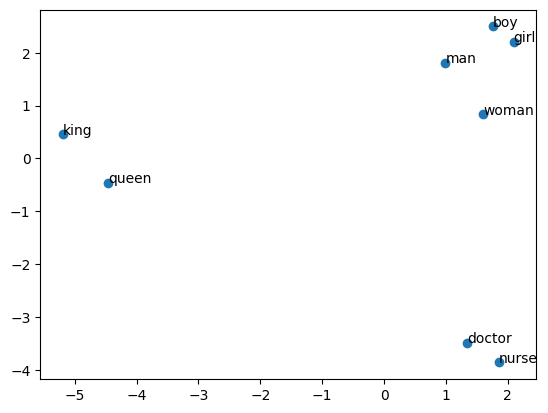

In [16]:
# the list of words we want to plot
words = ["man", "woman", "doctor", "nurse", "king", "queen", "boy", "girl"]

# an empty list for vectors
X = []
# get vectors for subset of words
for word in words:
    X.append(embeddings[word])

# Use PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# or try SVD - how are they different?
# svd = TruncatedSVD(n_components=2)
# fit_transform the initialized PCA model
# result = svd.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

# for each word in the list of words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

## Bonus tasks

If you run out of things to explore with these embeddings, try some of the following tasks:

- __make new plots like those above but cleaner and more informative__
- __write a script which takes a list of words and produces the output above__